# TASK-5: EXPLORATORY DATA ANALYSIS-SPORTS
## by Arunava Das 
### OBJECTIVE: 
- Perform Exploratory Data Analysis on dataset 'Indian Premier League'.
- As a sports analyst find out the most successful teams, players and factors contributing win or loss of a team.
- Suggest teams or players a company should endorse for its products.


## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing csv files

In [2]:
matches_data = pd.read_csv('matches.csv')
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries_data = pd.read_csv('deliveries.csv')
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Combining the data from matches.csv and deliveries.csv 

In [4]:
season_data = matches_data[['id','season','winner']]
raw_data = deliveries_data.merge(season_data, how = 'inner',left_on = 'match_id',right_on = 'id')
raw_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


In [5]:
matches_data.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [6]:
# dropping 3rd umpire column
matches_data = matches_data.drop(columns = ['umpire3'], axis = 1)
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


## Number of matches won by a team per season

In [7]:
wins_per_season = matches_data.groupby('season')['winner'].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

## Number of matches per season

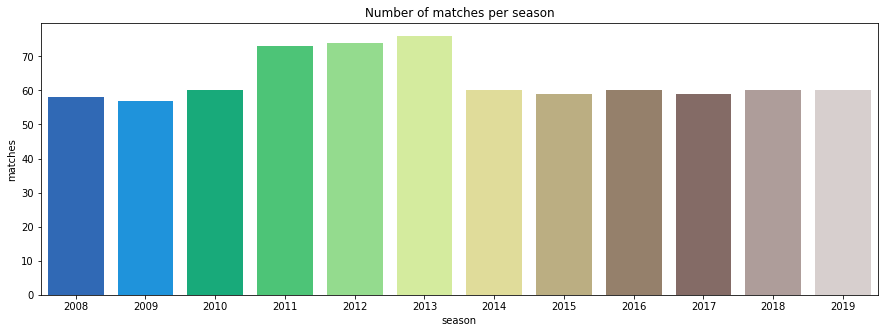

In [8]:
plt.figure(figsize = (15,5))
sns.countplot('season', data = matches_data, palette = "terrain")
plt.title('Number of matches per season')
plt.xlabel('season')
plt.ylabel('matches')
plt.show()

## Number of matches won by a team

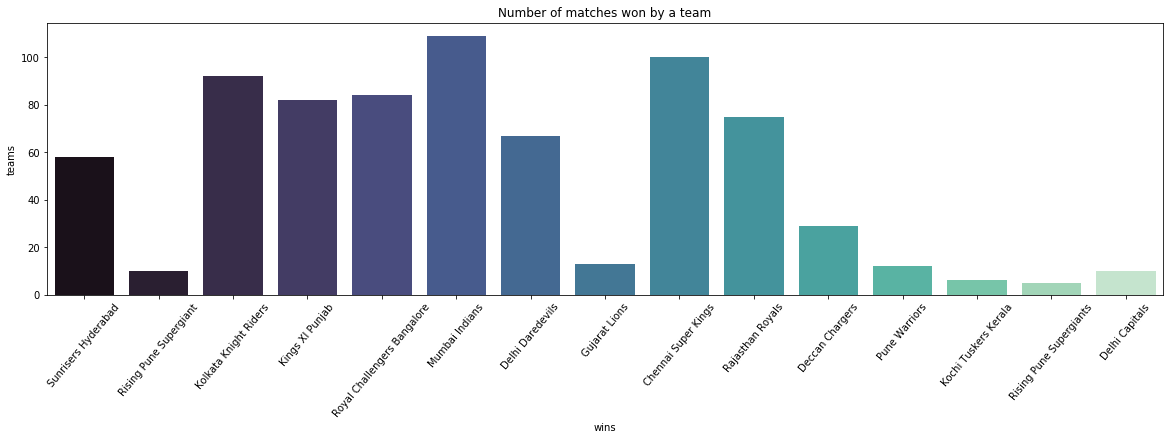

In [9]:
plt.figure(figsize = (20,5))
sns.countplot('winner', data = matches_data, palette = "mako")
plt.title('Number of matches won by a team')
plt.xticks(rotation = 50)
plt.xlabel('wins')
plt.ylabel('teams')
plt.show()

In [10]:
matches_data['win_by'] = np.where(matches_data['win_by_runs']>0, 'Bat first','Bowl first')
win = matches_data.win_by.value_counts()
labels = np.array(win.index)
sizes = win.values

## Match result w.r.t bowling or batting first

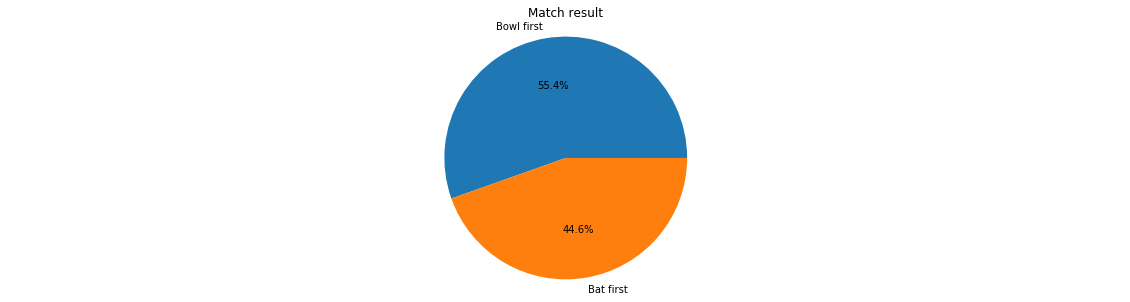

In [11]:
plt.figure(figsize = (20,5))
plt.pie(sizes,labels = labels, autopct = '%1.1f%%')
plt.title('Match result')
plt.axis('equal')
plt.show()

## Number of matches won by batting or bowling first per season

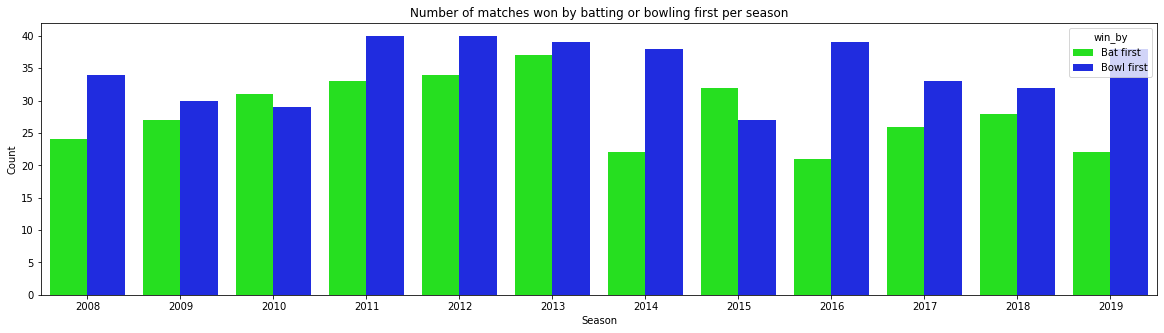

In [12]:
plt.figure(figsize = (20,5))
sns.countplot('season',hue = 'win_by',data = matches_data, palette = 'hsv')
plt.title('Number of matches won by batting or bowling first per season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

## Toss Result

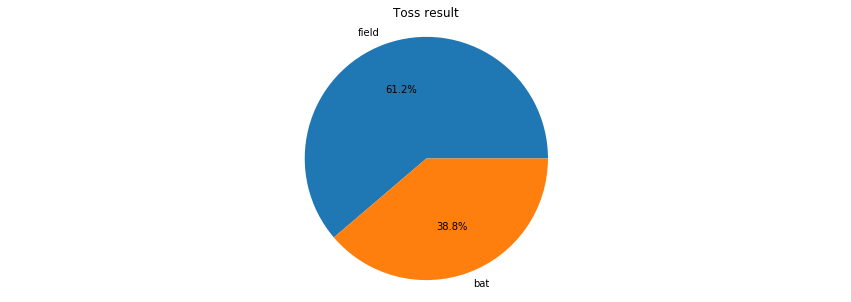

In [13]:
toss = matches_data.toss_decision.value_counts()
labels = np.array(toss.index)
sizes = toss.values
plt.figure(figsize = (15,5))
plt.pie(sizes,labels = labels, autopct = '%1.1f%%')
plt.title('Toss result')
plt.axis('equal')
plt.show()

## Number of wins by  team based on toss result

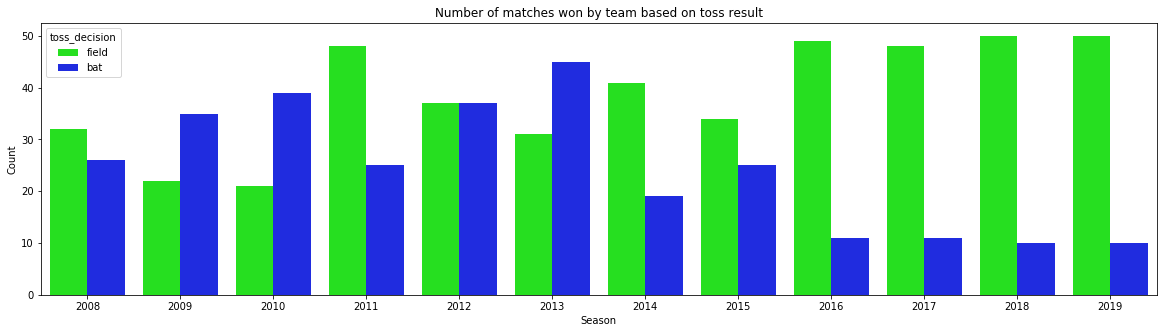

In [14]:
plt.figure(figsize = (20,5))
sns.countplot('season',hue = 'toss_decision',data = matches_data, palette = 'hsv')
plt.title('Number of matches won by team based on toss result')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

## Winners per season

In [15]:
final = matches_data.drop_duplicates(subset = ['season'],keep = 'last')
final[['season','winner']].reset_index(drop = True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


## Win percentage on Finals

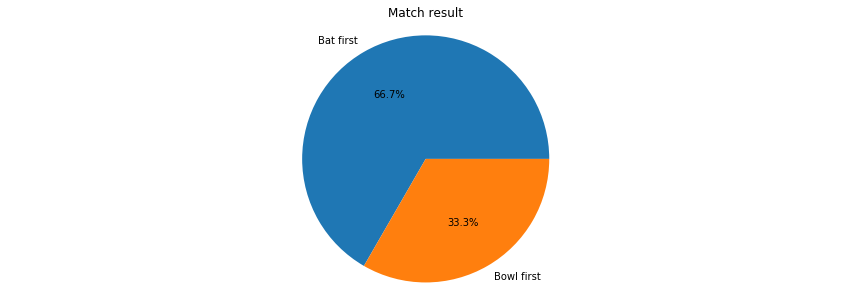

In [16]:
toss = final.win_by.value_counts()
labels = np.array(toss.index)
sizes = toss.values
plt.figure(figsize = (15,5))
plt.pie(sizes,labels = labels, autopct = '%1.1f%%')
plt.title('Match result')
plt.axis('equal')
plt.show()

## Toss result on Finals

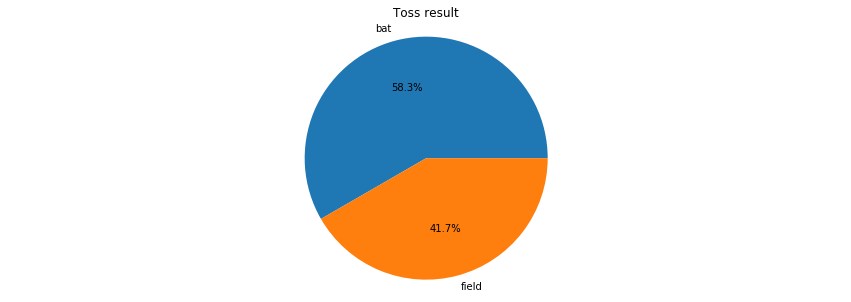

In [17]:
toss = final.toss_decision.value_counts()
labels = np.array(toss.index)
sizes = toss.values
plt.figure(figsize = (15,5))
plt.pie(sizes,labels = labels, autopct = '%1.1f%%')
plt.title('Toss result')
plt.axis('equal')
plt.show()

## Top players of IPL

#### Most player of the match winners

<Figure size 1440x360 with 0 Axes>

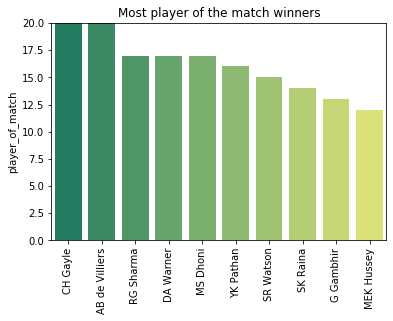

In [18]:
plt.figure(figsize = (20,5))
players = matches_data.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel('Count')
ax.set_title('Most player of the match winners')
players.plot.bar()
sns.barplot(x = players.index, y = players, orient='v', palette = 'summer')
plt.show()

#### IPL final venues along with winners

In [19]:
final.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

#### Number of IPLs won by a team

In [20]:
final['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Sunrisers Hyderabad      1
Deccan Chargers          1
Name: winner, dtype: int64

#### toss winner, toss decision and winner in finals

In [21]:
final[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


#### Player of the match winner in finals

In [22]:
final[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [23]:
len(final[final['toss_winner']==final['winner']]['winner'])

9

## Number of fours hit by a team

In [24]:
fours = raw_data[raw_data['batsman_runs']==4]
fours.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


## Most fours hit by a player

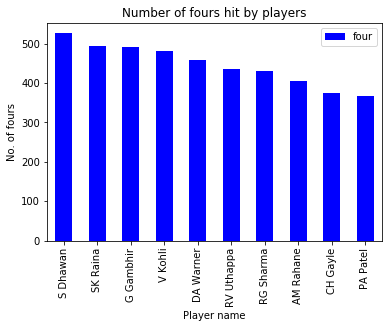

In [25]:
batsman_four = fours.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='blue')
plt.title('Number of fours hit by players')
plt.xlabel('Player name')
plt.ylabel('No. of fours')
plt.show()

## Number of fours hit per season

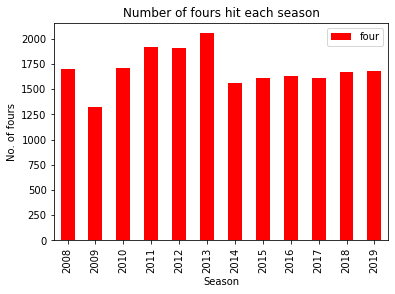

In [26]:
ax=fours.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color='red')
plt.title('Number of fours hit each season')
plt.xlabel('Season')
plt.ylabel('No. of fours')
plt.show()

## Number of sixes hit by a team

In [27]:
six = raw_data[raw_data['batsman_runs']==6]
six.groupby('batting_team')['batsman_runs'].agg([('runs by sixes','sum'),('sixes','count')])

,runs by sixes,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


## Most sixes hit by a player

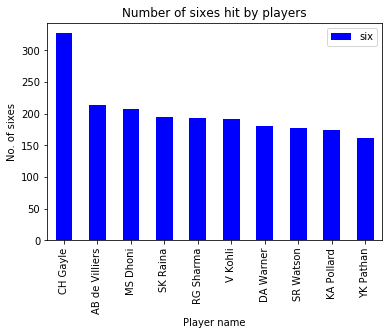

In [28]:
batsman_six = six.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='blue')
plt.title('Number of sixes hit by players')
plt.xlabel('Player name')
plt.ylabel('No. of sixes')
plt.show()

## Number of sixes hit per season

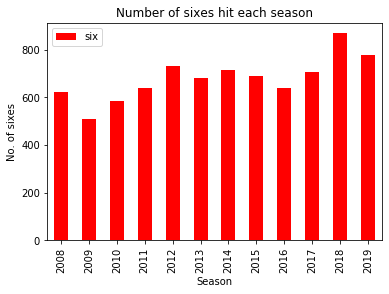

In [29]:
ax=six.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color='red')
plt.title('Number of sixes hit each season')
plt.xlabel('Season')
plt.ylabel('No. of sixes')
plt.show()

## Top 10 leading run scorers 

In [30]:
batsman_score = deliveries_data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=0).reset_index()
batsman_score = batsman_score.rename(columns={'sum':'batsman_runs'})
batsman_score.iloc[:10,:]

,index,batsman,batsman_runs
0,486,V Kohli,5434
1,428,SK Raina,5415
2,367,RG Sharma,4914
3,112,DA Warner,4741
4,392,S Dhawan,4632
5,92,CH Gayle,4560
6,290,MS Dhoni,4477
7,384,RV Uthappa,4446
8,26,AB de Villiers,4428
9,147,G Gambhir,4223


## Most number of matches played by a player

In [31]:
matches_played = raw_data[['match_id','player_dismissed']]
matches_played = matches_played.groupby('player_dismissed')['match_id'].count().reset_index().sort_values(by='match_id',ascending=0).reset_index(drop=True)
matches_played.columns=['batsman','No. of matches']
matches_played.head(5)

,batsman,No. of matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


## Dismissals in IPL

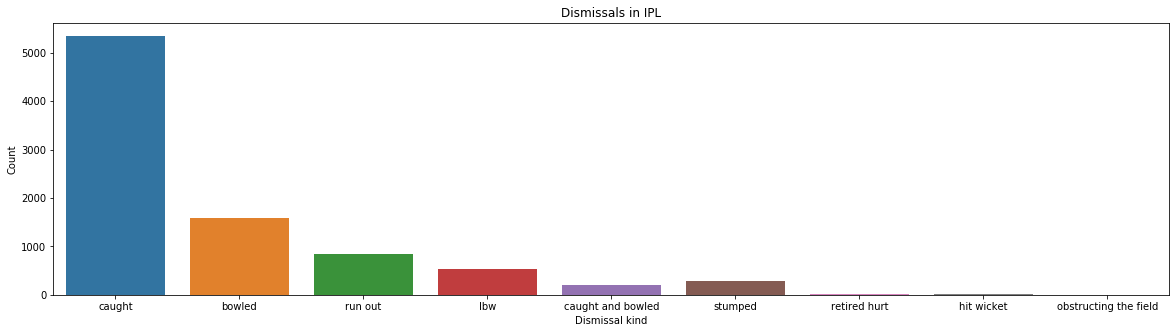

In [32]:
plt.figure(figsize=(20,5))
ax=sns.countplot(deliveries_data.dismissal_kind)
plt.title('Dismissals in IPL')
plt.xlabel('Dismissal kind')
plt.ylabel('Count')
plt.show()

## Top 10 wicket takers

In [33]:
wickets = deliveries_data.dropna(subset=['dismissal_kind'])
wickets = wickets[~wickets['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
wickets.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=0).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


## Conclusion
1. The highest number of matches played in IPL season was in 2011-2013 seasons.
2. Mumbai Indians have won the most number of IPL matches.
3. Most teams decide to field first after winning the toss.
4. Teams which bowl first have higher chances of winning than those who bat first.
5. In finals most teams after winning the toss have decided to bat first.
6. In finals teams batting first have won more matches than teams that have bowled first.
7. CH Gayle and AB de Villiers have won the most player of the match awards.
8. Mumbai Indians is the most successful team having won IPL 4 times.
9. Shikhar Dhawan has hit the highest number of fours.
10. CH Gayle has hit the highest number of sixes.
11. The leading run scorers in the IPL are V Kohli, SK Raina, RG Sharma.
12. SK Raina has played the most number of matches in IPL.
13. Dismissals in IPL were most by Caught.
14. The leading wicket takers in the IPL are SL Malinga, A Mishra, Harbhajan Singh.